In [5]:
import pandas as pd
import tensorflow as tf
import os.path
from sklearn.preprocessing import OneHotEncoder

In [6]:
# column_names = ['鄉鎮市區', '土地移轉總面積平方公尺', '移轉層次', '建物型態', '建物移轉總面積平方公尺', '房', '廳', '衛', '主建物面積', '陽台面積', '電梯']
column_names = ['district', 'rps03', 'rps09', 'rps11', 'rps15', 'rps16', 'rps17', 'rps18', 'rps28', 'rps30', 'rps31','rps22']
replace_column_names = ['district', 'land_area', 'floors', 'building_type', 'building_area', 'room', 'hall', 'bathroom', 'main_building_area', 'balcony_area', 'elevator','price_per_square_meter']


In [7]:
# Get the current directory
current_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(current_directory)
# Define the file path
data_file_path = os.path.join(parent_directory, 'data\不動產實價登錄資訊.csv')
df = pd.read_csv(data_file_path)
# filter out rps01(交易標的): 只保留有包含「房地」的
df = df[df['rps01'].str.contains('房地')]
# filter out rps11(建物型態 ): 只保留不包含「其他」的
df = df[~df['rps11'].str.contains('其他')]
# filter out rps12(主要用途): 只保留包含「住家用」的
df = df[df['rps12'].str.contains('住家用', na=False)]

# leave only rps22(單價平方公尺)
df_price = df['rps22']

df = df[column_names]

'''Leave only columns after factorize'''
# factorize district
df['district'] = pd.factorize(df['district'])[0]
# factorize floors
df['rps09'] = pd.factorize(df['rps09'])[0]
# factorize building_type
df['rps11'] = pd.factorize(df['rps11'])[0]
# factorize elevator
df['rps31'] = pd.factorize(df['rps31'])[0]

# Replace column names to Engilsh
df.columns = replace_column_names

# replace column names in df to ['鄉鎮市區', '土地移轉總面積平方公尺', '移轉層次', '建物型態', '建物移轉總面積平方公尺', '房', '廳', '衛', '主建物面積', '陽台面積', '電梯']
df_data = pd.DataFrame(df, columns=replace_column_names)
df_data['floors'][:20]



0      0
5      1
7      2
16     3
17     4
19     2
21     5
22     6
24     7
29     8
33     9
38     9
41    10
42    11
43    11
46     7
48    12
50     1
53    12
54    13
Name: floors, dtype: int64

In [8]:
'''One hot encoding'''
# encoder = OneHotEncoder(sparse=False)

# # Fit and transform the 'district' and 'building_type' columns
# encoded_features = encoder.fit_transform(df_data[['district', 'building_type']])

# # Convert the sparse matrix to a DataFrame and set the column names
# encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['district', 'building_type']))

# # Concatenate the original DataFrame with the one-hot encoded DataFrame
# df_data = pd.concat([df_data.drop(['district', 'building_type'], axis=1), encoded_df], axis=1)
# df_data

'One hot encoding'

In [9]:
df_data.isnull().any()

district                  False
land_area                 False
floors                    False
building_type             False
building_area             False
room                      False
hall                      False
bathroom                  False
main_building_area        False
balcony_area              False
elevator                  False
price_per_square_meter    False
dtype: bool

In [10]:

corr_matrix = df_data.corr(method="pearson")
corr_matrix


,district,land_area,floors,building_type,building_area,room,hall,bathroom,main_building_area,balcony_area,elevator,price_per_square_meter
district,1.000000,0.031955,0.004255,-0.045275,0.059793,0.004645,0.027240,0.020076,0.031657,0.061582,-0.079364,-0.350085
land_area,0.031955,1.000000,0.009771,0.276789,0.371421,0.171411,0.125217,0.159179,0.513660,0.225313,0.173591,-0.054179
floors,0.004255,0.009771,1.000000,-0.081278,0.114704,-0.011579,-0.007743,0.010879,0.104601,0.004254,-0.035229,0.056646
building_type,-0.045275,0.276789,-0.081278,1.000000,-0.198261,0.241936,0.044055,0.120858,0.248767,-0.112118,0.909937,-0.183118
building_area,0.059793,0.371421,0.114704,-0.198261,1.000000,0.343191,0.289258,0.346186,0.810853,0.631193,-0.256639,-0.020453
room,0.004645,0.171411,-0.011579,0.241936,0.343191,1.000000,0.428123,0.599169,0.460955,0.256941,0.220157,-0.135529
hall,0.027240,0.125217,-0.007743,0.044055,0.289258,0.428123,1.000000,0.209947,0.295683,0.209994,0.023668,-0.045434
bathroom,0.020076,0.159179,0.010879,0.120858,0.346186,0.599169,0.209947,1.000000,0.399710,0.245868,0.077514,-0.067167
main_building_area,0.031657,0.513660,0.104601,0.248767,0.810853,0.460955,0.295683,0.399710,1.000000,0.540262,0.171891,-0.118478
balcony_area,0.061582,0.225313,0.004254,-0.112118,0.631193,0.256941,0.209994,0.245868,0.540262,1.000000,-0.168344,-0.100804


In [11]:
corr_matrix['price_per_square_meter'].sort_values(ascending=False)

price_per_square_meter    1.000000
floors                    0.056646
building_area            -0.020453
hall                     -0.045434
land_area                -0.054179
bathroom                 -0.067167
balcony_area             -0.100804
main_building_area       -0.118478
room                     -0.135529
elevator                 -0.153533
building_type            -0.183118
district                 -0.350085
Name: price_per_square_meter, dtype: float64

Saving figure Correlation_plot (Price per Square Meter)


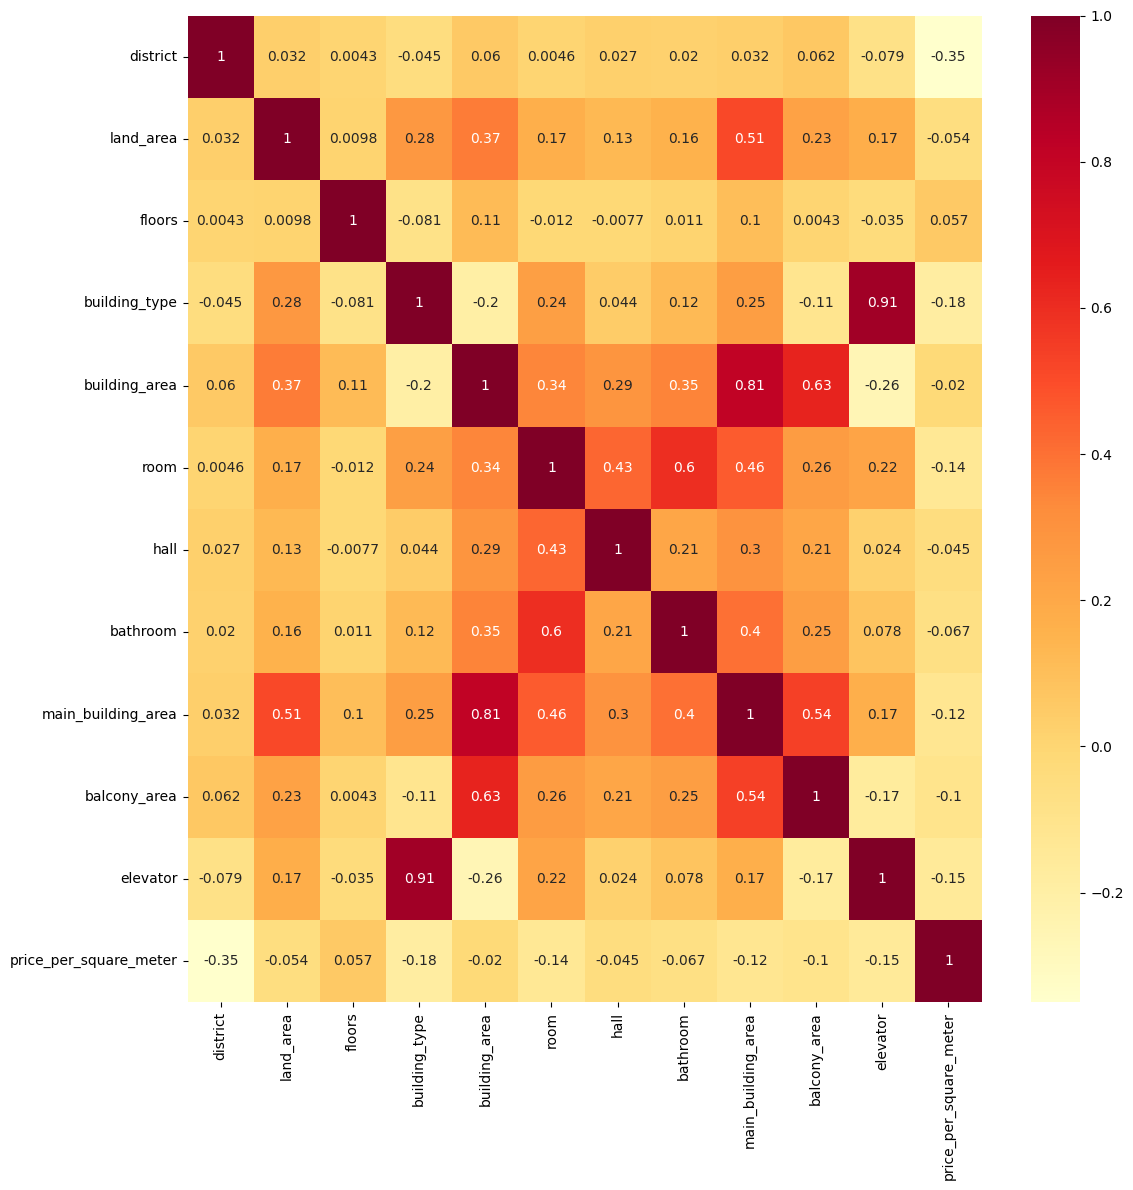

In [12]:
import seaborn as sns # 引入seaborn
import matplotlib.pyplot as plt # 引入pyplot

# Where to save the figures
PROJECT_ROOT_DIR = parent_directory
PLOT_IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Image", 'Plot')
os.makedirs(PLOT_IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(PLOT_IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

plt.figure(figsize= (len(df.columns), len(df.columns))) # 圖形大小
sns.heatmap(df_data.corr(),annot = True,cmap='YlOrRd') # 塗顏色
save_fig("Correlation_plot (Price per Square Meter)") # 儲存圖形
plt.show() # 顯示圖形

Model coefficient: [-2814.96695691    25.10157605   112.49436707 -5860.90754877
   105.99364516 -3484.460418     970.98714401  1243.05600522
  -152.02396013  -889.88307306 -2118.92546228]
Saving figure LinearRegression_predict_vs_actual (Price per Square Meter)


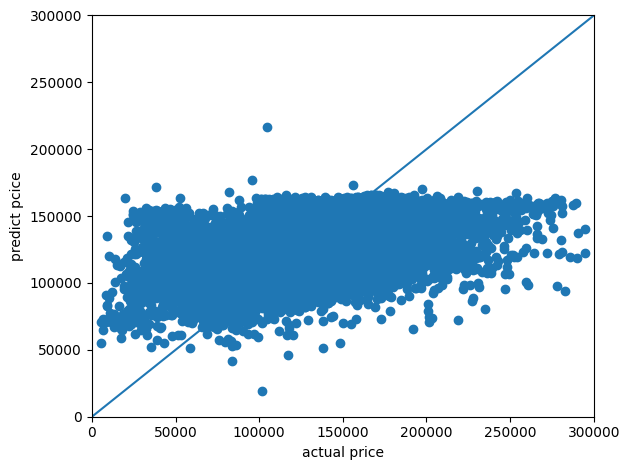

LinearRegression RMSE: 42179.969045421734
LinearRegression MAE: 31067.872972046443
Train Score: 0.1873843157600289
Test Score: 0.17656648764047944


In [ ]:
from sklearn.linear_model import LinearRegression # 引入LinearRegression
from sklearn.model_selection import train_test_split # 引入train_test_split
import matplotlib.pyplot as plt # 引入pyplot
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score


x = df.drop("price_per_square_meter", axis = 1) # 13個特徵的數據
# y = df_price_normalized # 房價數據
y = df_price # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train) # 將資料拿去訓練
print('Model coefficient:',lin_reg.coef_) # 顯示係數
y_predict = lin_reg.predict(x_test) # 北test的資料用訓練出來的模型去預測

# y_test = scaler.inverse_transform(y_test)
# y_predict_inverse = scaler.inverse_transform(y_predict)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 300000) # x軸的範圍
plt.ylim(0, 300000) # y軸的範圍
plt.plot([0,300000], [0,300000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("LinearRegression_predict_vs_actual (Price per Square Meter)") # 儲存圖形
plt.show() # 察看結果

'''Compute Model's error'''
lin_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('LinearRegression RMSE:',lin_reg_rmse)
mean = np.mean(np.abs(y_test - y_predict))
print("LinearRegression MAE: {}".format(mean))


'''Model Score Comparison'''
train_score = lin_reg.score(x_train, y_train)
print('Train Score:',train_score)
test_score = lin_reg.score(x_test, y_test)
print('Test Score:',test_score)
r2 = r2_score(y_test, y_predict)          # equivalent to lin_reg.score(x_test, y_test)
print(f"Test R^2: {r2:.4f}")

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

'''Compute Model's error'''
housing_predictions = lin_reg.predict(x_test)
lin_rmse = mean_squared_error(y_test, housing_predictions,squared=False)
print('Linear regression RMSE:',lin_rmse)
mean = np.mean(np.abs(y_test - housing_predictions))
print("Linear regression MAE: {}".format(mean))

Linear regression RMSE: 42179.969045421734
Linear regression MAE: 31067.872972046443


In [15]:
import joblib

Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'LinearRegression (Price per Square Meter).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)
joblib.dump(lin_reg,Model_path)

['c:\\Users\\jgw09\\School\\NTUST_IM\\Junior_Second\\AI\\Final_Project\\housePricePredict\\Model\\LinearRegression (Price per Square Meter).pkl']

In [16]:
lin_reg.score(x_train, y_train) # 訓練模型的正確率

0.1873843157600289

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
df_price_normalized = pd.DataFrame(scaler.fit_transform(df_price.to_numpy().reshape(-1, 1)))

In [18]:
df_price_normalized

,0
0,-0.091634
1,0.902611
2,-1.823907
3,-0.298960
4,-0.069203
...,...
45278,0.946574
45279,0.687685
45280,0.714561
45281,0.659603


C:\Users\jgw09\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
Saving figure neural_network_predict_vs_actual (Price per Square Meter)


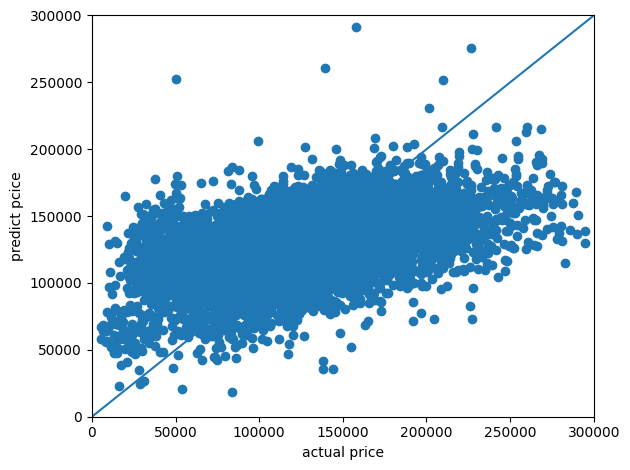

Neural Network RMSE: 40065.70586213225
Neural Network MAE: 29412.95391487624
991/991 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7013 - mean_absolute_error: 0.6404
Train loss: 0.7120898365974426
425/425 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7386 - mean_absolute_error: 0.6472
Test loss: 0.7702147364616394


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = df.drop("price_per_square_meter", axis = 1) # 13個特徵的數據
y = df_price_normalized # 房價數據
# y = df_price # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比

input_dim = 11

# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 32 neurons
model.add(Dense(32, input_dim=input_dim, activation='relu'))

# Add another hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))

# Add an output layer with 1 neuron (for regression)
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Model Path
Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'Neural Network (Price per Square Meter).h5'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)

# Train the model
if os.path.exists(Model_path):
    model = tf.keras.models.load_model(Model_path)
else:
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    # Save Model
    model.save(Model_path)

# Make predictions
y_predict = model.predict(x_test)

'''Plot NN prediction vs actual'''
y_predict_inverse = scaler.inverse_transform(y_predict)
y_test_inverse = scaler.inverse_transform(y_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 300000) # x軸的範圍
plt.ylim(0, 300000) # y軸的範圍
plt.plot([0,300000], [0,300000]) # 劃一條基準線
plt.scatter(y_test_inverse, y_predict_inverse) # 比對預測跟實際的差別
save_fig("neural_network_predict_vs_actual (Price per Square Meter)") # 儲存圖形
plt.show() # 察看結果

'''Compute Model's error'''
nn_rmse = mean_squared_error(y_test_inverse, y_predict_inverse,squared=False)
print('Neural Network RMSE:',nn_rmse)
mean = np.mean(np.abs(y_test_inverse - y_predict_inverse))
print("Neural Network MAE: {}".format(mean))

'''Model Score Comparison'''
train_score = model.evaluate(x_train, y_train)
print('Train loss:', train_score[0])
test_score = model.evaluate(x_test,y_test)
print('Test loss:',test_score[0])

Saving figure DecisionTree_predict_vs_actual (Price per Square Meter)


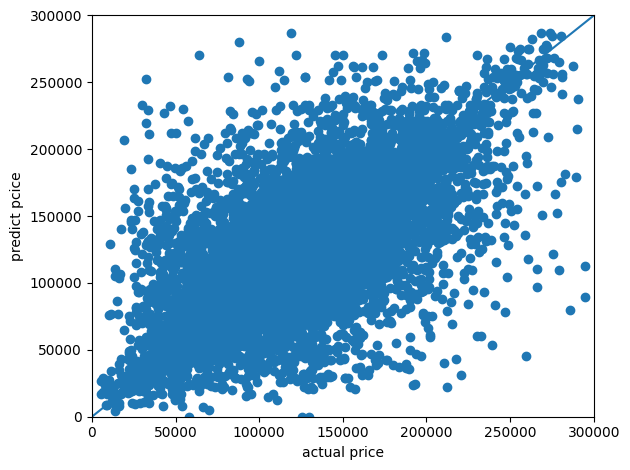

Decision Tree RMSE: 37442.67656600753
Decision Tree MAE: 22341.890222978775
Train Score: 0.9982765141412868
Test Score: 0.3511417997834002


In [20]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np


x = df.drop("price_per_square_meter", axis = 1) # 13個特徵的數據
# y = df_price_normalized # 房價數據
y = df_price # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

y_predict = tree_reg.predict(x_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 300000) # x軸的範圍
plt.ylim(0, 300000) # y軸的範圍
plt.plot([0,300000], [0,300000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("DecisionTree_predict_vs_actual (Price per Square Meter)") # 儲存圖形
plt.show() # 察看結果

'''Compute Model's error'''
dt_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('Decision Tree RMSE:',dt_reg_rmse)
mean = np.mean(np.abs(y_test - y_predict))
print("Decision Tree MAE: {}".format(mean))


'''Model Score Comparison'''
train_score = tree_reg.score(x_train, y_train)
print('Train Score:',train_score)
test_score = tree_reg.score(x_test, y_test)
print('Test Score:',test_score)

In [21]:
import joblib

Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'Decision Tree (Price per Square Meter).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)
joblib.dump(tree_reg,Model_path)

['c:\\Users\\jgw09\\School\\NTUST_IM\\Junior_Second\\AI\\Final_Project\\housePricePredict\\Model\\Decision Tree (Price per Square Meter).pkl']

In [22]:
import numpy as np

'''Compute Model's error'''
dt_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('Decision Tree RMSE:',dt_reg_rmse)
mean = np.mean(np.abs(y_test - y_predict))
print("Decision Tree MAE: {}".format(mean))

Decision Tree RMSE: 37442.67656600753
Decision Tree MAE: 22341.890222978775


Saving figure Random_Forest_predict_vs_actual (Price per Square Meter)


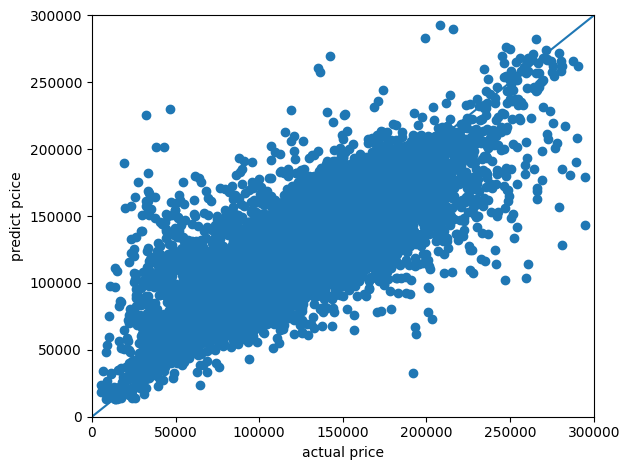

RandomForest RMSE: 28484.022615456015
RandomForest MAE: 16800.42329649382
Train Score: 0.9509176826153787
Test Score: 0.624492454215942


In [23]:
from sklearn.ensemble import RandomForestRegressor

# Model Path
Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'RF_reg (Price per Square Meter).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)

if os.path.exists(Model_path):
    RF_reg = joblib.load(Model_path)
else:
    RF_reg = RandomForestRegressor(random_state=42)
    RF_reg.fit(x_train, y_train)
    # Save Model
    joblib.dump(RF_reg,Model_path)

result = RF_reg.score(x_test, y_test)
y_predict = RF_reg.predict(x_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 300000) # x軸的範圍
plt.ylim(0, 300000) # y軸的範圍
plt.plot([0,300000], [0,300000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("Random_Forest_predict_vs_actual (Price per Square Meter)") # 儲存圖形
plt.show() # 察看結果

'''Compute Model's error'''
RF_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('RandomForest RMSE:',RF_reg_rmse)
RF_reg_mean = np.mean(np.abs(y_test - y_predict))
print("RandomForest MAE: {}".format(RF_reg_mean))


'''Model Score Comparison'''
train_score = RF_reg.score(x_train, y_train)
print('Train Score:',train_score)
test_score = RF_reg.score(x_test, y_test)
print('Test Score:',test_score)

Saving figure Gradient_Boost_predict_vs_actual (Price per Square Meter)


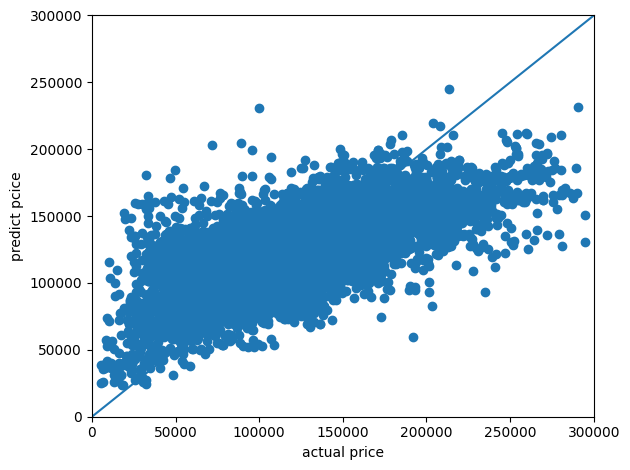

Gradient Boosting Regressor RMSE: 33057.10564510637
Gradient Boosting Regressor MAE: 22794.575883500587
Train Score: 0.5443703891164222
Test Score: 0.4942386052724612


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Model Path
Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'GB_reg (Price per Square Meter).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)

if os.path.exists(Model_path):
    GB_reg = joblib.load(Model_path)
else:
    GB_reg = GradientBoostingRegressor()
    GB_reg.fit(x_train, y_train)
    # Save Model
    joblib.dump(GB_reg,Model_path)

result = GB_reg.score(x_test, y_test)
y_predict = GB_reg.predict(x_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 300000) # x軸的範圍
plt.ylim(0, 300000) # y軸的範圍
plt.plot([0,300000], [0,300000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("Gradient_Boost_predict_vs_actual (Price per Square Meter)") # 儲存圖形
plt.show() # 察看結果

'''Predict error'''
GB_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('Gradient Boosting Regressor RMSE:',GB_reg_rmse)
GB_reg_mean = np.mean(np.abs(y_test - y_predict))
print("Gradient Boosting Regressor MAE: {}".format(GB_reg_mean))

'''Model Score Comparison'''
train_score = GB_reg.score(x_train, y_train)
print('Train Score:',train_score)
test_score = GB_reg.score(x_test, y_test)
print('Test Score:',test_score)

In [25]:
# from sklearn import svm

# # Create a SVM classifier with default parameters
# model_svc = svm.SVC()

# # Train the model using the training sets
# model_svc.fit(x_train, y_train)
# y_predict = model_svc.predict(x_test)

# plt.xlabel("actual price") # x軸的標題
# plt.ylabel("predict pcice") # y軸的標題
# plt.xlim(0, 300000) # x軸的範圍
# plt.ylim(0, 300000) # y軸的範圍
# plt.plot([0,300000], [0,300000]) # 劃一條基準線
# plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
# save_fig("SVM_predict_vs_actual (Price per Square Meter)") # 儲存圖形
# plt.show() # 察看結果

In [26]:
''''Grid Search'''
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Create a base model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [300],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'bootstrap': [True, False],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3,\
    n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
# best_params

best_params


Fitting 3 folds for each of 2 candidates, totalling 6 fits


KeyboardInterrupt: 

In [ ]:
# predict the test data
y_predict=grid_search.predict(x_test)
RF_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('RandomForest RMSE:',RF_reg_rmse)
RF_reg_mean = np.mean(np.abs(y_test - y_predict))
print("RandomForest MAE: {}".format(RF_reg_mean))

RandomForest RMSE: 28214.521612161047
RandomForest MAE: 16692.68966907949


{'n_estimators': 300 ,
 'max_depth': None ,
 'min_samples_split': 2 ,
 'min_samples_leaf': 1 ,
 'bootstrap': True }

Saving figure FineTuned_Random_Forest_predict_vs_actual (Price per Square Meter,Grid Search)


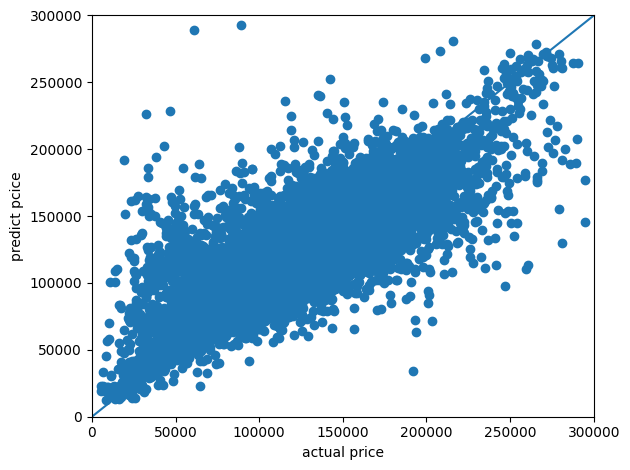

RandomForest RMSE: 28346.06913080849
RandomForest MAE: 16721.40074918993
Train Score: 0.9524951254132139
Test Score: 0.6281209536269378


In [ ]:
'''Show Fine Tuned Model Result'''
# Model Path
Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'FineTuned_RF_reg (Price per Square Meter,Grid Search).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)
# best_params = grid_search.best_params_
if os.path.exists(Model_path):
    best_rf = joblib.load(Model_path)
else:
    # Train a new model with the best parameters
    best_rf = RandomForestRegressor(**best_params)
    best_rf.fit(x_train, y_train)
    #save model
    joblib.dump(best_rf,Model_path)

print('{\'n_estimators\':',best_rf.get_params()['n_estimators'],',')
print(' \'max_depth\':',best_rf.get_params()['max_depth'],',')
print(' \'min_samples_split\':',best_rf.get_params()['min_samples_split'],',')
print(' \'min_samples_leaf\':',best_rf.get_params()['min_samples_leaf'],',')
print(' \'bootstrap\':',best_rf.get_params()['bootstrap'],"}")
print('')
result = best_rf.score(x_test, y_test)
y_predict = best_rf.predict(x_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 300000) # x軸的範圍
plt.ylim(0, 300000) # y軸的範圍
plt.plot([0,300000], [0,300000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("FineTuned_Random_Forest_predict_vs_actual (Price per Square Meter,Grid Search)") # 儲存圖形
plt.show() # 察看結果

'''Model error'''
RF_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('RandomForest RMSE:',RF_reg_rmse)
RF_reg_mean = np.mean(np.abs(y_test - y_predict))
print("RandomForest MAE: {}".format(RF_reg_mean))

'''Model Score Comparison'''
train_score = best_rf.score(x_train, y_train)
print('Train Score:',train_score)
test_score = best_rf.score(x_test, y_test)
print('Test Score:',test_score)

In [27]:
from sklearn.ensemble import RandomForestRegressor

'''Randomized Search'''
def randomize_search_model(model):
    param_distribs = {
        'n_estimators': randint(low=1, high=1200),
        'max_features': randint(low=1, high=8),
        'min_samples_split': randint(low=1, high=10),
        'min_samples_leaf': randint(low=1, high=10),
        'bootstrap': [True, False],
    }

    rnd_search = RandomizedSearchCV(model, param_distributions=param_distribs,
                                    n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
    
    return rnd_search

rf = RandomForestRegressor(random_state=42)
rand_search = randomize_search_model(rf)
rand_search.fit(x_train, y_train)
best_params = rand_search.best_params_


KeyboardInterrupt: 

Saving figure FineTuned_Random_Forest_predict_vs_actual (Price per Square Meter,Random Search)


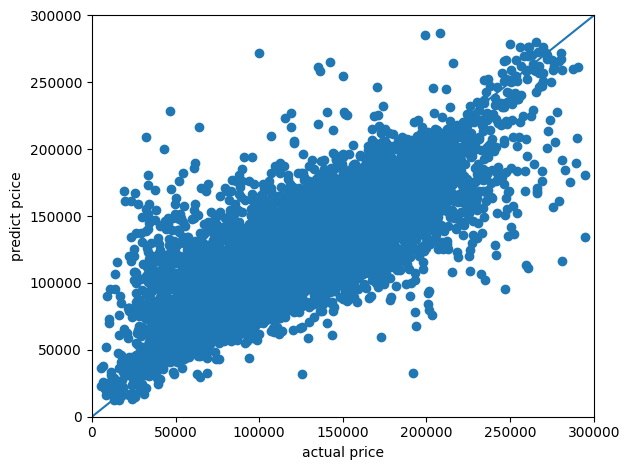

RandomForest RMSE: 28358.560410888782
RandomForest MAE: 16583.735993050414
Train Score: 0.9753118457250498
Test Score: 0.6277931290658403


In [ ]:
'''Show Fine Tuned Model Result'''
# Model Path
Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'FineTuned_RF_reg (Price per Square Meter,Random Search).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)
# best_params = rand_search.best_params_
if os.path.exists(Model_path):
    best_rf = joblib.load(Model_path)
else:
    # Train a new model with the best parameters
    best_rf = RandomForestRegressor(**best_params)
    best_rf.fit(x_train, y_train)
    #save model
    joblib.dump(best_rf,Model_path)

result = best_rf.score(x_test, y_test)
y_predict = best_rf.predict(x_test)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 300000) # x軸的範圍
plt.ylim(0, 300000) # y軸的範圍
plt.plot([0,300000], [0,300000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("FineTuned_Random_Forest_predict_vs_actual (Price per Square Meter,Random Search)") # 儲存圖形
plt.show() # 察看結果

'''Model Error'''
RF_reg_rmse = mean_squared_error(y_test, y_predict,squared=False)
print('RandomForest RMSE:',RF_reg_rmse)
RF_reg_mean = np.mean(np.abs(y_test - y_predict))
print("RandomForest MAE: {}".format(RF_reg_mean))

'''Model Score Comparison'''
train_score = best_rf.score(x_train, y_train)
print('Train Score:',train_score)
test_score = best_rf.score(x_test, y_test)
print('Test Score:',test_score)